In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3

In [4]:
def basic_analysis(data):
    for k in data.keys():
        print(k, end=':')
        print(data[k].shape, end='  ')
    
    plt.figure(figsize=(15,7))
    i = 1
    for h_idx, v_idx, h_label, v_label in [[0, 1, 'x', 'y'], [0, 2, 'x', 'z'], [1, 2, 'y', 'z']]:
        plt.subplot(2,3,i)
        plt.plot(data['pos'][:,h_idx], data['pos'][:,v_idx], ',')
        plt.xlabel(h_label)
        plt.ylabel(v_label)
        plt.subplot(2,3,i+3)
        i+=1
        plt.plot(data['vel'][:,h_idx], data['vel'][:,v_idx], ',')
        plt.xlabel('v'+h_label)
        plt.ylabel('v'+v_label)
    plt.show()

    xy = [np.linalg.norm(r[0:1]) for r in data['pos']]
    plt.plot(data['time'], xy, '.-')
    plt.xlabel('time')
    plt.ylabel('distance')
    plt.show()
    #mpld3.display()

    vel = [np.linalg.norm(v) for v in data['vel']]
    plt.plot(data['time'], vel)

    dv = np.diff([0] + vel)
    plt.plot(data['time'], dv, '.')

    dv_av = np.average(dv)
    dv_var = np.var(dv)
    print("dv average: %e" % dv_av)
    print("dv variance: %e" % dv_var)

    plt.hist(dv, bins=1000, normed=1)
    plt.xlim(-0.004, 0.004)
    plt.show()

    plt.hist(dv, bins=1000, normed=1)
    x = np.arange(- 0.0, 0.003, 0.00001)
    y = (1./np.sqrt(2*np.pi*(dv_var))) * np.exp(-(x - dv_av)**2./(2. * dv_var))
    plt.plot(x, y, 'r', linewidth=3.0)
    plt.xlim(-0.001, 0.003)
    plt.show()

# (1) NED frame, Bias compensation

vel:(60122, 3)  time:(60122,)  mag:(60122, 3)  ang:(60122, 3)  acl:(60122, 3)  qtn:(60122, 4)  pos:(60122, 3)  

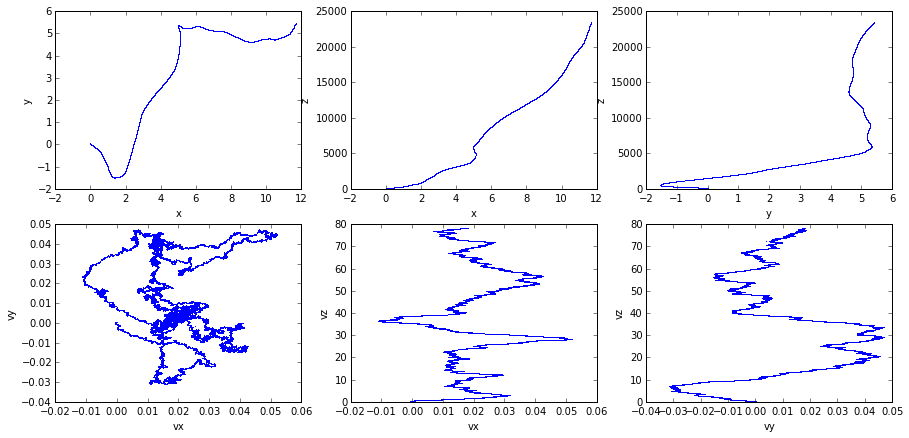

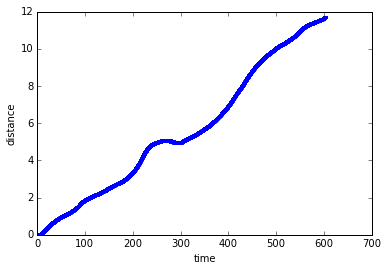

dv average: 1.293959e-03
dv variance: 8.196976e-08


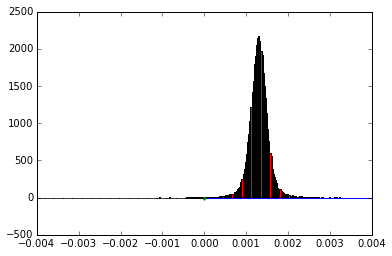

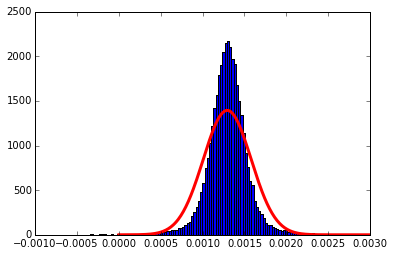

In [8]:
data1 = np.load("../data/20150915_171326.npz")
basic_analysis(data1)

# (2) 1+Indoor Heading Mode

time:(64691,)  ang:(64691, 3)  vel:(64691, 3)  acl:(64691, 3)  mag:(64691, 3)  pos:(64691, 3)  qtn:(64691, 4)  

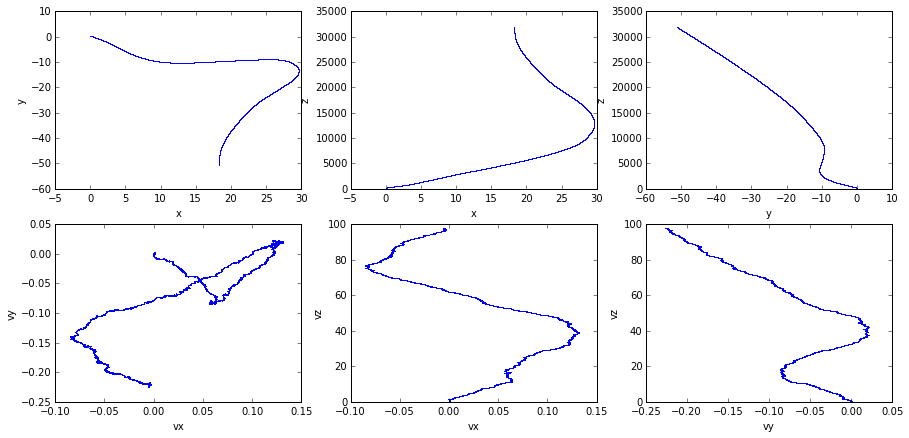

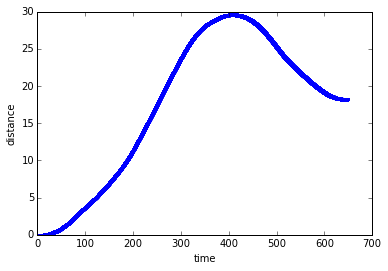

dv average: 1.506328e-03
dv variance: 4.244588e-08


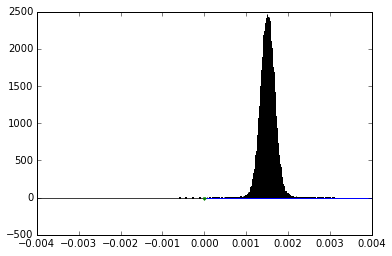

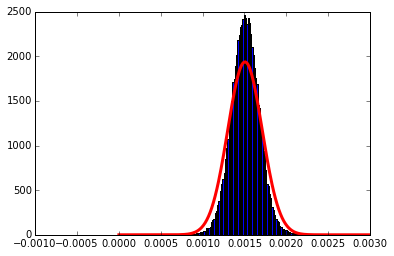

In [6]:
data2 = np.load("../data/20150924_132503.npz")
basic_analysis(data2)

# (3) Hight Update Rate

acl:(144327, 3)  qtn:(144327, 4)  vel:(144327, 3)  time:(144327,)  mag:(144327, 3)  ang:(144327, 3)  pos:(144327, 3)  

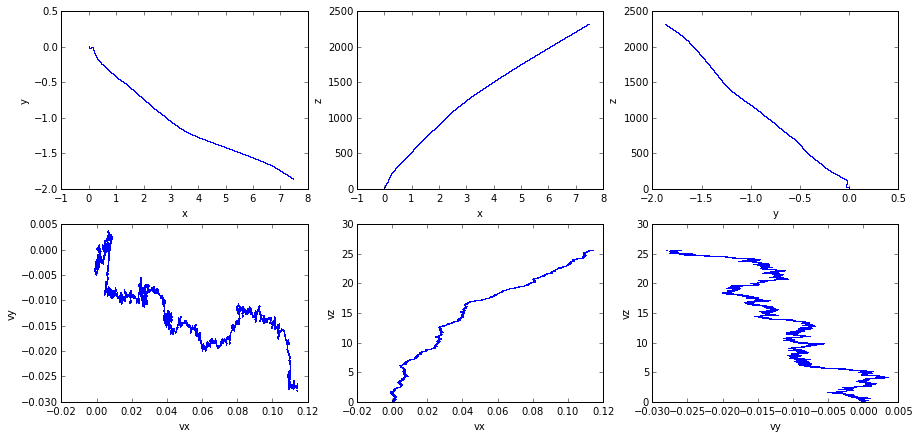

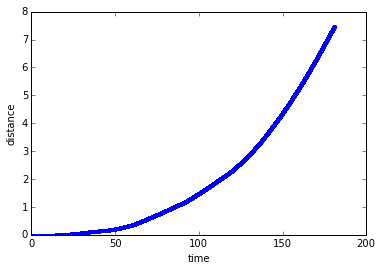

dv average: 1.769305e-04
dv variance: 1.629231e-09


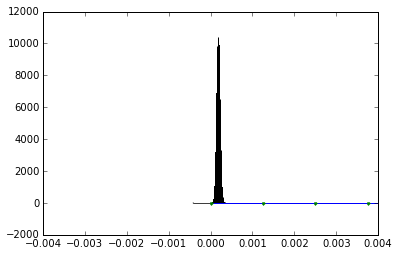

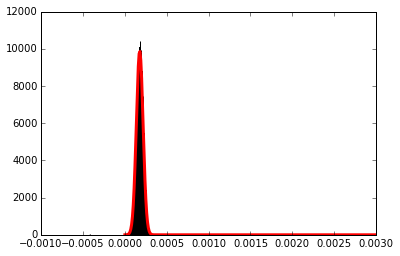

In [16]:
data3 = np.load("../data/20150924_183735.npz")
basic_analysis(data3)

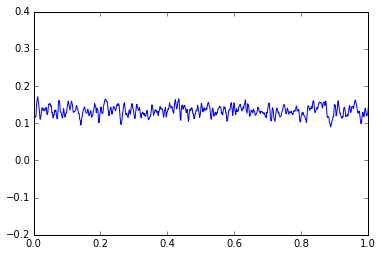

In [27]:
plt.plot(data3['time'], data3['acl'][:,0], '-')
plt.xlim(0,1)
plt.show()